In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi'] = 150
import warnings
warnings.filterwarnings('ignore')

In order to investigate the feasibility of starting a Sunday edition for a large metropolitan 
newspaper, information was obtained from a sample of 34 newspapers concerning thei 
daily and Sunday circulations (in thousands) give me the dependent and independent variable

In [2]:
# read data 
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/NewspaperData.csv')
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
# Select the relevant columns
df = df[['daily', 'sunday']]
df.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


<Axes: xlabel='daily', ylabel='sunday'>

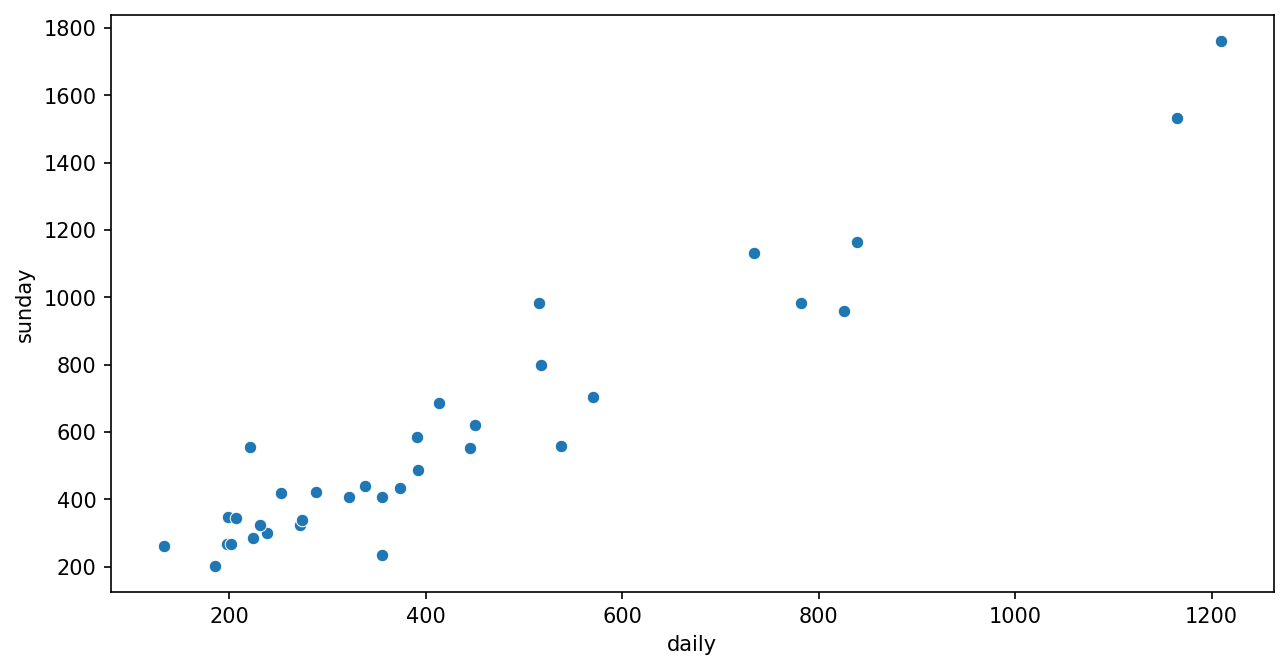

In [4]:
#Correlation Analysis
sns.scatterplot(x= df['daily'], y =df['sunday'])

In [5]:
df.corr() #almost 96% relationship between daily and sunday

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: >

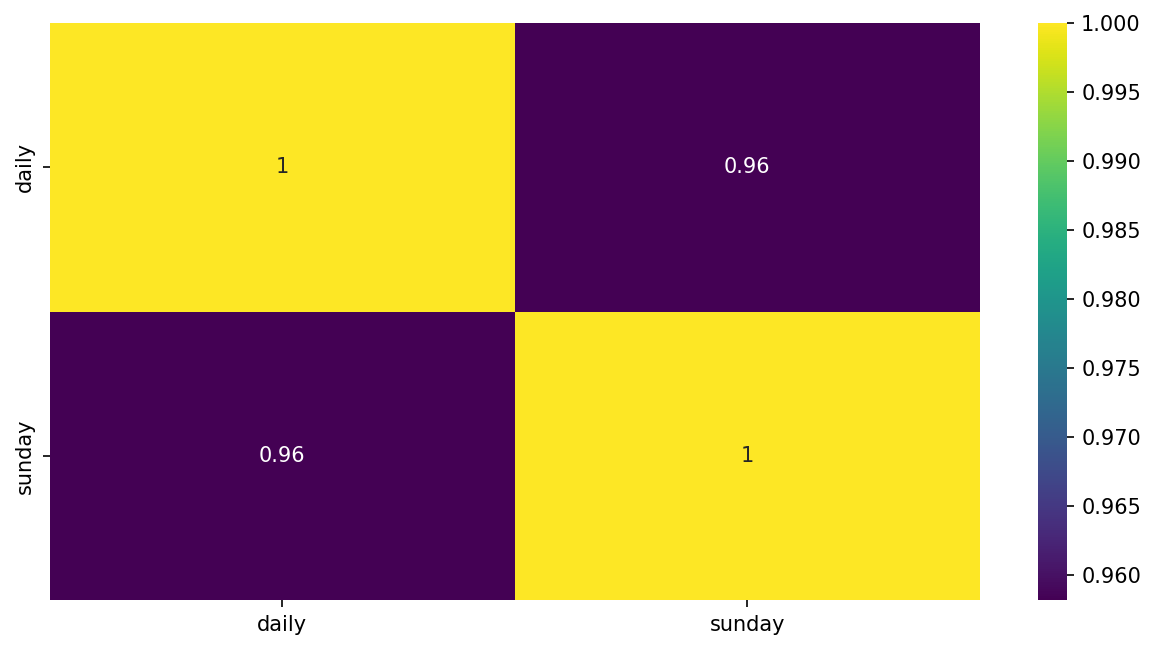

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [7]:
# Once we understand there a relationship between dependent and independent variable then next would be Model building

In [8]:
# Import statsmodels

In [9]:
import statsmodels.formula.api as smf

In [10]:
#.fit() calculates the slope (m) and intercept (c) 
# model = smf.ols('target variable ~ independent variable',data=df).fit()
model = smf.ols('sunday~daily',data=df).fit()
model

In [11]:
#Model parameters (slope, intercept)
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [12]:
#line equation
daily_sales = 850
#y = mx + c
sunday_sales = 1.33 * daily_sales + 13.83
sunday_sales

1144.33

In [13]:
#Print p value
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [14]:
#r2 value
model.rsquared, model.rsquared_adj

(0.9180596895873295, 0.9154990548869336)

In [15]:
#Prediction for new data

In [16]:
df.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [17]:
test = pd.DataFrame({
    'daily' : [100,152,850,654,759]
})
test


,daily
0,100
1,152
2,850
3,654
4,759


In [18]:
model.predict(test)

0     147.807106
1     217.472273
2    1152.593174
3     890.009081
4    1030.679131
dtype: float64

#### In -Class Activity
- We need to predict the adipose tissue(Fat) level based of Waist Circum.


In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/WC_AT.csv')
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [71]:
data['AT'].skew()

0.584869324127853

In [70]:
data['Waist'].skew()

0.1340560824786468

<Axes: xlabel='Waist', ylabel='AT'>

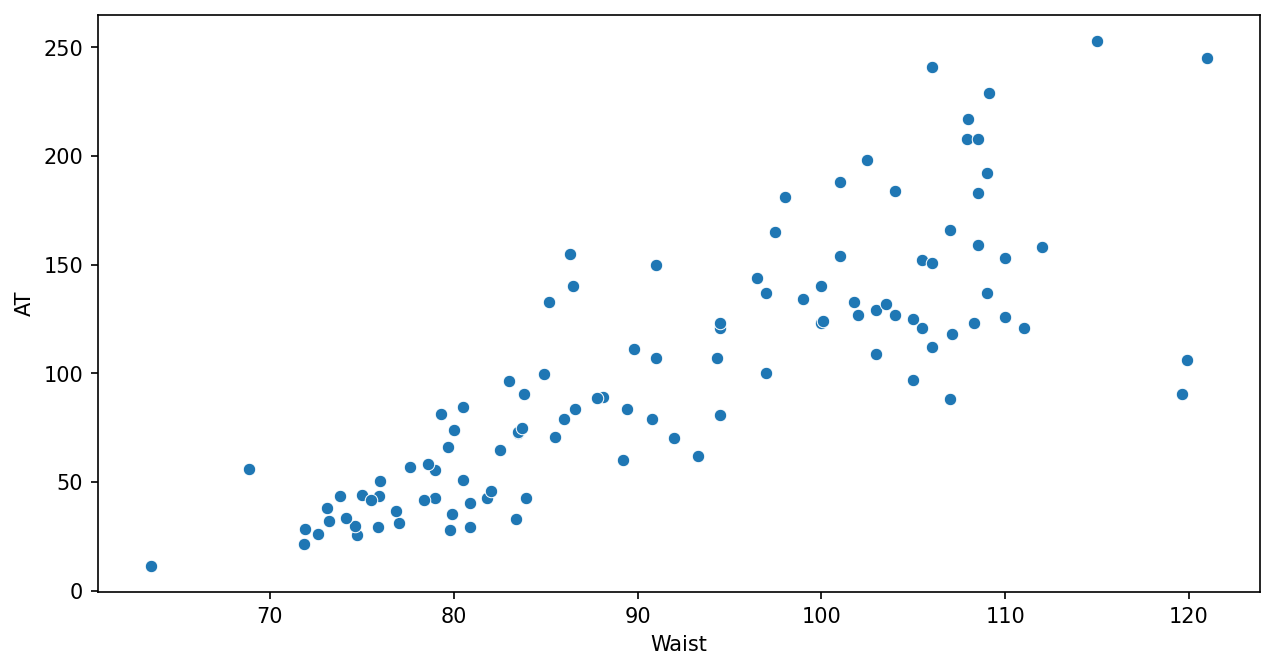

In [20]:
sns.scatterplot(x= data["Waist"], y = data["AT"])

In [21]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<Axes: >

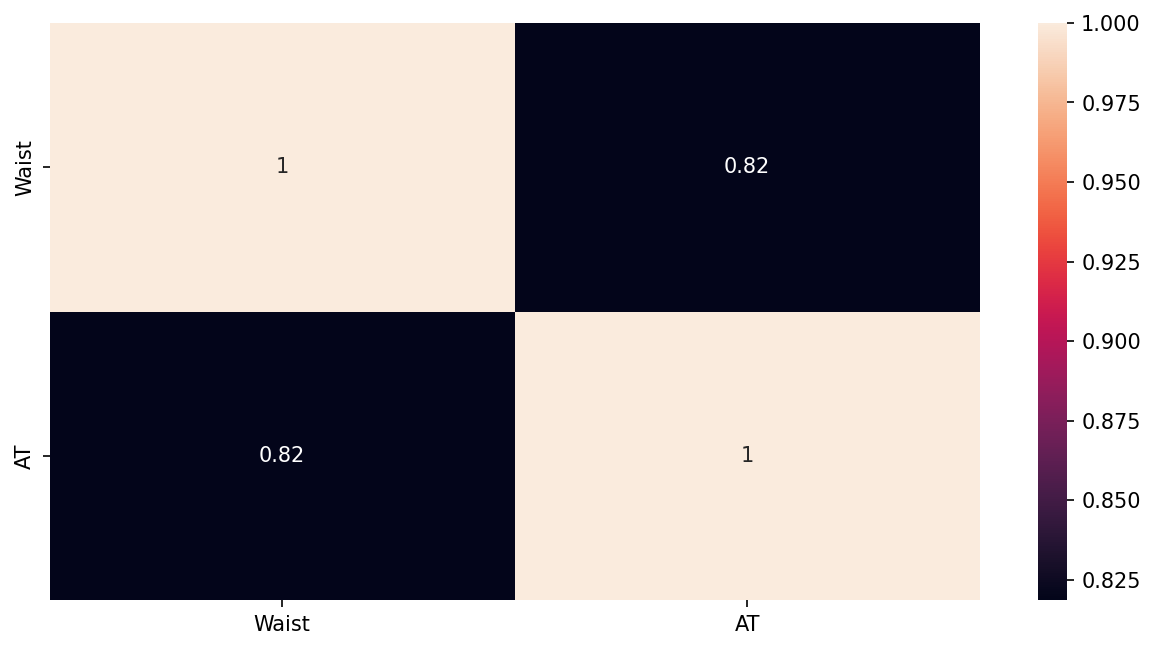

In [22]:
sns.heatmap(data.corr(),annot=True)

In [23]:
#82 % correlation

In [24]:
# Model Buliding

In [25]:
# import statsmodels.formula.api as smf

In [26]:
model1= smf.ols("AT~Waist", data=data).fit()

In [27]:
model1.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [28]:
model1.pvalues

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64

In [29]:
model1.rsquared

0.670036893052843

In [30]:
model1.rsquared_adj

0.6669531256981966

In [31]:
test1 = pd.DataFrame({
    'Waist' : [74.65,152,850,654,759]
})
test1

,Waist
0,74.65
1,152.00
2,850.00
3,654.00
4,759.00


In [32]:
model1.predict(test1)

0      42.222366
1     309.765140
2    2724.048995
3    2046.112554
4    2409.292791
dtype: float64

#### Data Transformation
- Sqrt
- Log
- Remove Skewness that is present by the outlies

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/NewspaperData.csv')
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [34]:
# Distribution of the data
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [35]:
# The plt.subplot() function in Matplotlib is used to create multiple plots in a single figure. It takes three arguments:
# nrows: The number of rows in the subplot grid.
# ncols: The number of columns in the subplot grid.
# index: The index of the subplot to create.

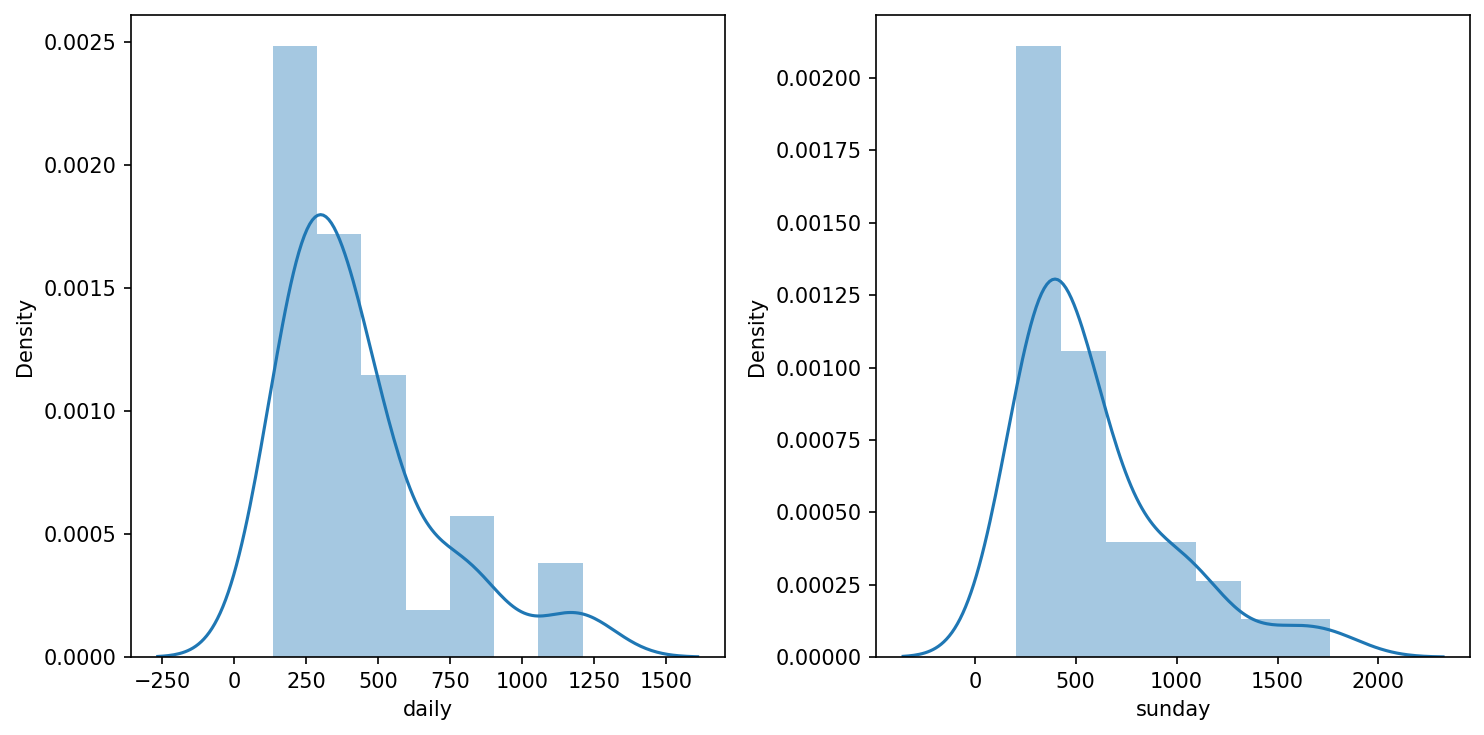

In [37]:
plt.subplot(1,2,1)
sns.distplot(df['daily'])

plt.subplot(1,2,2)
sns.distplot(df['sunday'])
plt.tight_layout()

In [38]:
# The above graph show that skewness is present

In [39]:
# checking the level of skewness

Skewness

![](skkeeww.png)

Level of skewness

![](levelofskew.png)

In [41]:
df['daily'].skew(), df['sunday'].skew()

(1.5321591323040094, 1.5644730738925112)

#### Log Transformation
- Log transformation is a mathematical operation applied to data that involves taking the logarithm of each value in a dataset.
- Convert the data to Approx Normal Distribution
- By using numpy 

In [42]:
np.log(df['daily'])

0     5.971139
1     6.248006
2     5.873885
3     5.474600
4     6.287450
5     6.598202
6     5.292460
7     5.531902
8     5.328866
9     5.443184
10    6.108703
11    5.664941
12    5.224326
13    7.059951
14    6.097132
15    6.023135
16    5.606831
17    6.661594
18    7.097735
19    6.716004
20    5.410520
21    5.871675
22    6.245182
23    5.395739
24    5.822075
25    5.283813
26    4.892145
27    5.924280
28    5.612559
29    6.346275
30    5.969439
31    5.307574
32    5.773389
33    6.732094
Name: daily, dtype: float64

In [44]:
df["log_daily"] = np.log(df['daily'])
df.head()

,Newspaper,daily,sunday,log_daily
0,Baltimore Sun,391.952,488.506,5.971139
1,Boston Globe,516.981,798.298,6.248006
2,Boston Herald,355.628,235.084,5.873885
3,Charlotte Observer,238.555,299.451,5.474600
4,Chicago Sun Times,537.780,559.093,6.287450


In [45]:
df["log_sunday"] = np.log(df['sunday'])
df.head()

,Newspaper,daily,sunday,log_daily,log_sunday
0,Baltimore Sun,391.952,488.506,5.971139,6.191352
1,Boston Globe,516.981,798.298,6.248006,6.682482
2,Boston Herald,355.628,235.084,5.873885,5.459943
3,Charlotte Observer,238.555,299.451,5.474600,5.701951
4,Chicago Sun Times,537.780,559.093,6.287450,6.326316


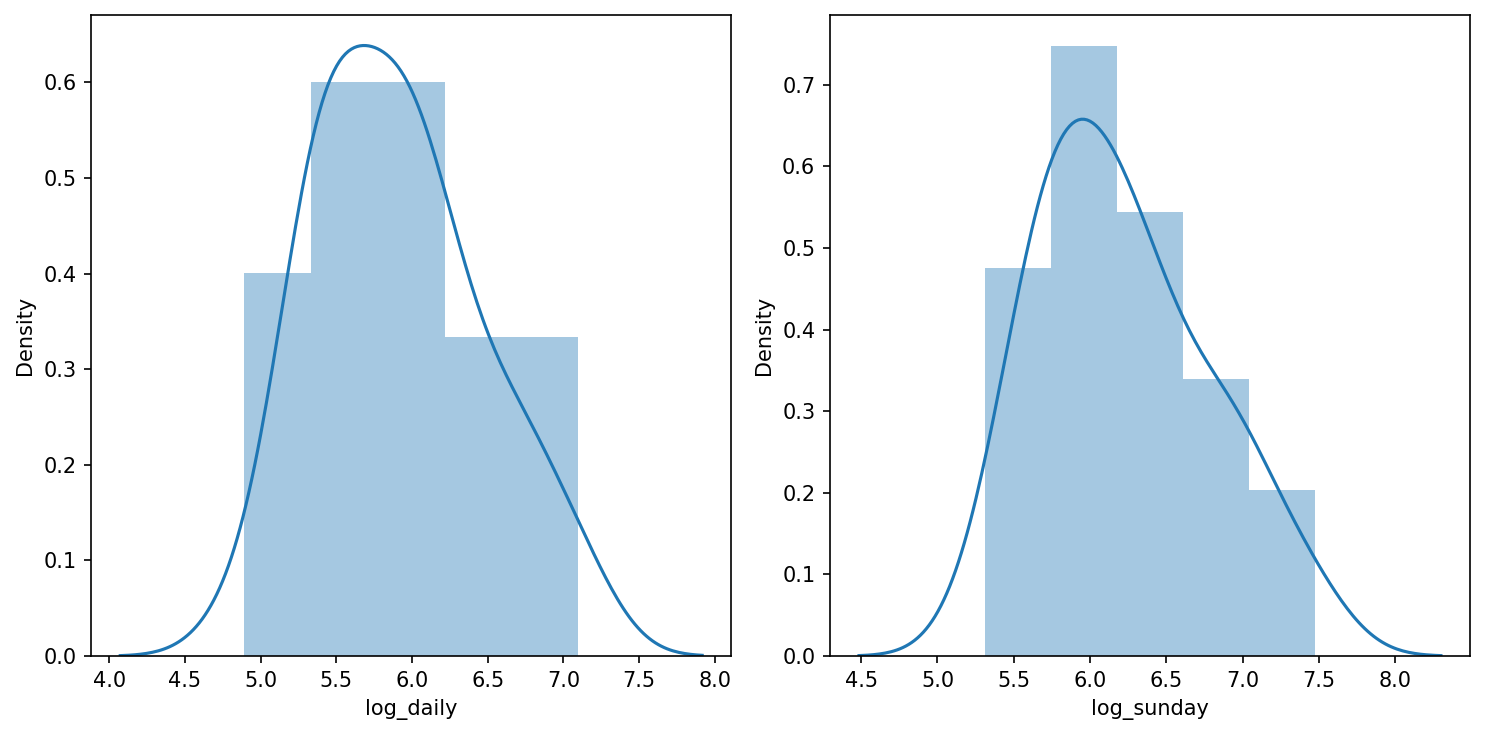

In [58]:
plt.subplot(1,2,1)
sns.distplot(df["log_daily"])

plt.subplot(1,2,2)
sns.distplot(df["log_sunday"])

plt.tight_layout()

In [60]:
# Skewness of the above graph is moderate by using log transformation

In [61]:
df['log_daily'].skew(), df['log_sunday'].skew()

(0.4682202000020356, 0.5337572087816101)

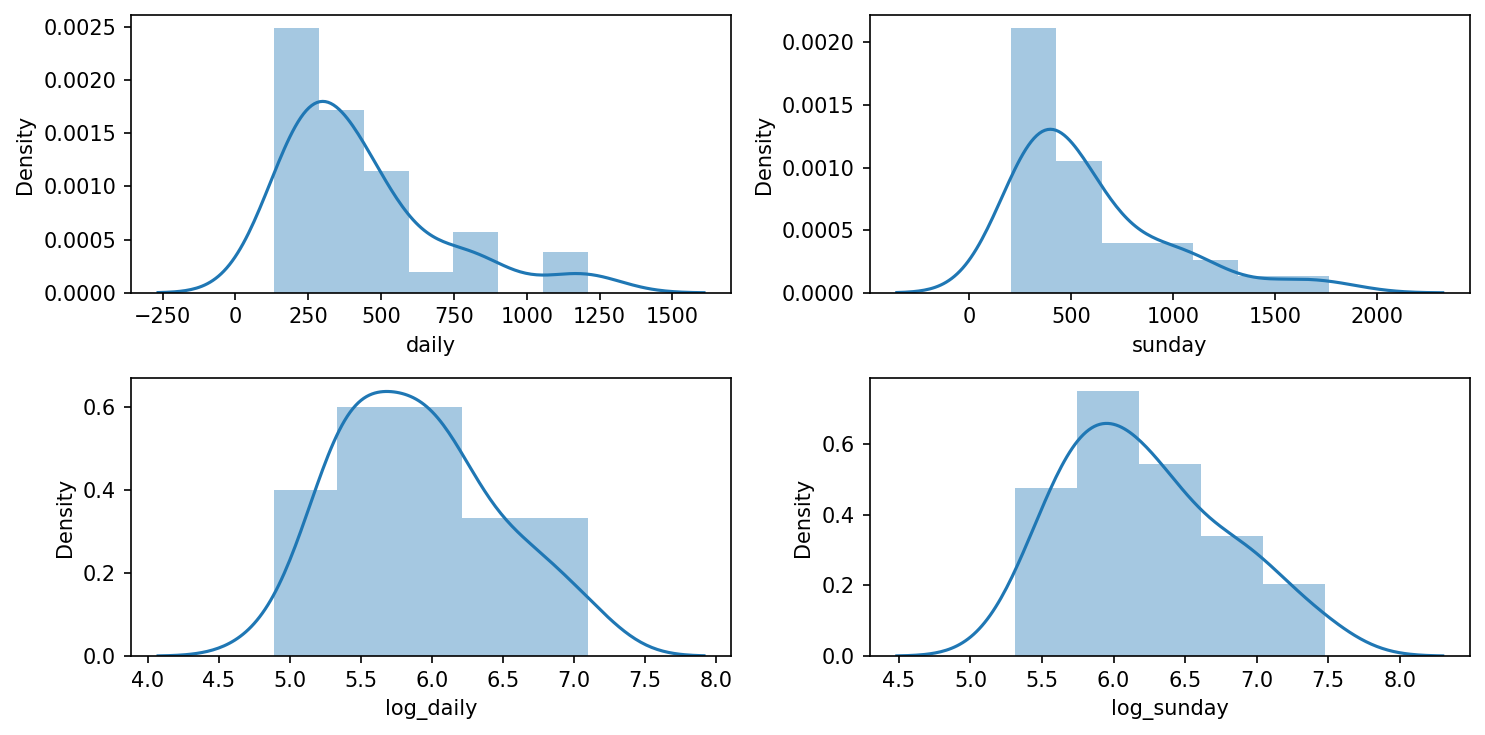

In [59]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])

plt.subplot(2,2,2)
sns.distplot(df['sunday'])

plt.subplot(2,2,3)
sns.distplot(df["log_daily"])

plt.subplot(2,2,4)
sns.distplot(df["log_sunday"])

plt.tight_layout()

In [62]:
# Sqrt transformation

In [66]:
df['sqrt_daily'] = np.sqrt(df['daily'])
df['sqrt_sunday'] = np.sqrt(df['sunday'])
df.head()

,Newspaper,daily,sunday,log_daily,log_sunday,sqrt_daily,sqrt_sunday
0,Baltimore Sun,391.952,488.506,5.971139,6.191352,19.797778,22.102172
1,Boston Globe,516.981,798.298,6.248006,6.682482,22.737216,28.254168
2,Boston Herald,355.628,235.084,5.873885,5.459943,18.858102,15.332449
3,Charlotte Observer,238.555,299.451,5.474600,5.701951,15.445226,17.304653
4,Chicago Sun Times,537.780,559.093,6.287450,6.326316,23.190084,23.645147


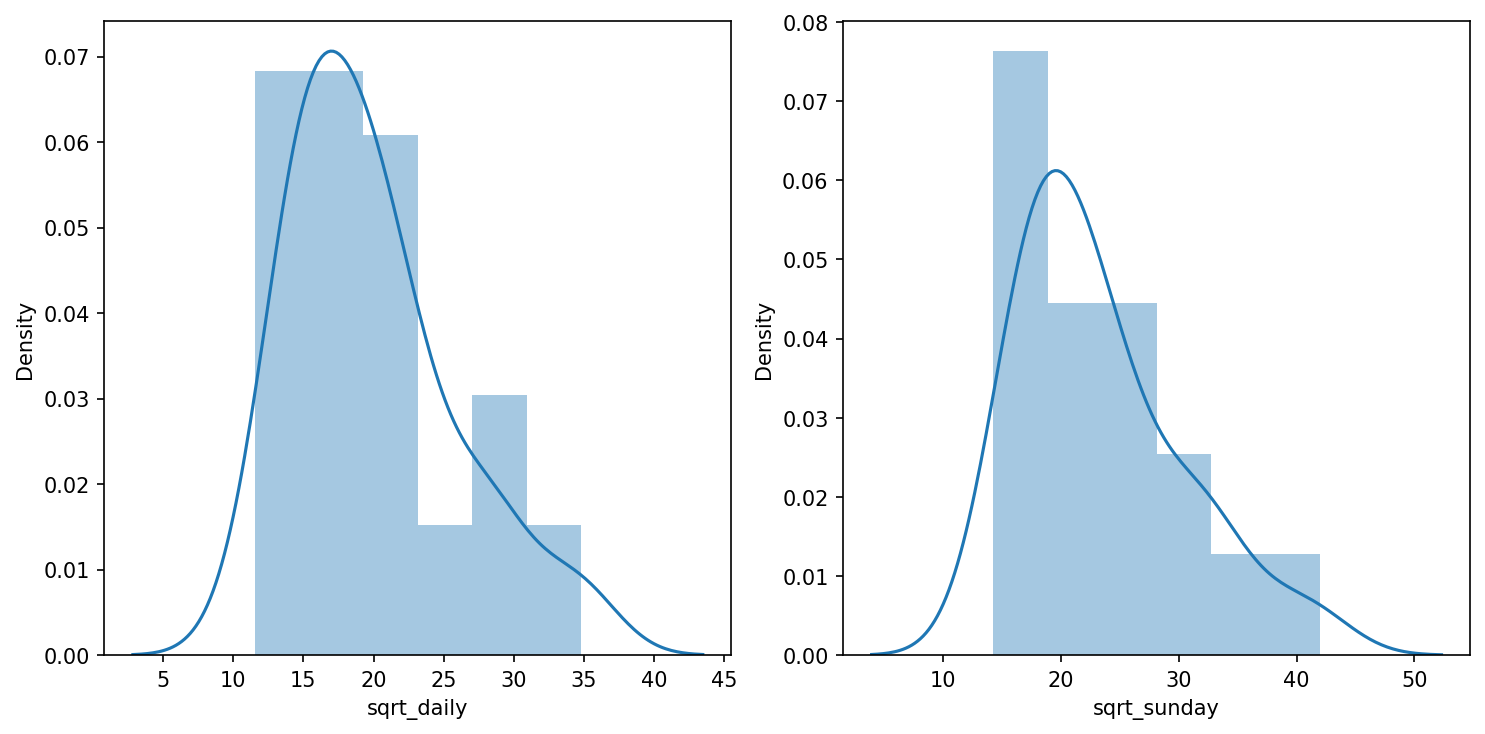

In [64]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_daily'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_sunday'])

plt.tight_layout()

In [65]:
df['sqrt_daily'].skew() ,df['sqrt_sunday'].skew()

(1.0075247084922163, 1.0392935145699538)

In [74]:
# Log transformation is much more effective then square root transformation
# DONT APPLY BOTH ON SAME DATA
# WE USE THESE TRANSFORMATION FOR REMOVING THE SKEWNESS WITHOUT DELETING THE OUTLIERS OR WITHOUT REPLACING THE OUTLIERS WITH THE UPPER AND LOWER EXTREME VALUE (CAPPING)